<div style="border-width:5px; border-style:double; border-radius:10px; border-top-color:blue; border-bottom-color:red; padding:15px; box-shhadow:3px 3px 10px rgba(0,0,0,0.3);background:linear-gradient(to right, darkblue, red); border-right-color:blue; border-left-color:red"> 
<h1 style="text-align:center; font-weight:bold; font-size: 34px; color:white"> Haiti’s Food Economy: Analyzing Price Differences by Region and Commodities</h1>
</div>

---

### Installing required libraries

In [55]:
%pip install pandas numpy seaborn matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV


### Dataset URL (from GitHup Repository)

Click the link below to access to dataset:

https://github.com/carl3991/Hands-On-Haiti

---

#### Uploading the dataset from device


In [57]:
import os

# This shows current working directory to read the csv file correctly
print(os.getcwd())  

# Lists all files in the directory to make sure the file is visible
print('The list of file in my directory:\n', os.listdir())  


/home/af2ea8f5-1f9a-4091-9c13-db2b59ea1801/Haiti
The list of file in my directory:
 ['.ipynb_checkpoints', 'wfp_food_prices_hti.csv', 'FoodEconomy_modeling.ipynb', 'Folium_LauchSite.ipynb', 'FoodEconomy_folium.ipynb', 'cleaned_food_prices.csv', 'FoodEconomy_EDA.ipynb']


Now, let's load the dataset.

In [58]:
# Loading the csv file
haiti_df = pd.read_csv("/home/af2ea8f5-1f9a-4091-9c13-db2b59ea1801/Haiti/wfp_food_prices_hti.csv")

# Show top 5 rows of dataset
print(haiti_df.head())

         date      admin1      admin2            market  latitude   longitude  \
0       #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat    #geo+lon   
1  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
2  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
3  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
4  2005-01-15      Centre      Hinche            Hinche     19.15  -72.016667   

             category               commodity        unit         priceflag  \
0          #item+type              #item+name  #item+unit  #item+price+flag   
1  cereals and tubers      Maize meal (local)     Marmite            actual   
2  cereals and tubers           Rice (tchako)     Marmite            actual   
3  cereals and tubers  Wheat flour (imported)     Marmite            actual   
4  cereals and tubers   Maize meal (imported)       Pound            actual   

          pricetype   currency   price

In [59]:
# Dataset size
print('The size of the dataset:',haiti_df.shape)

The size of the dataset: (14924, 14)


---

# Data Cleaning

#### Missing Values

Let's verify if there are missing values.

In [60]:
# Creating missing values object
missing_values = haiti_df.isnull().sum()

# Showing missing values
print('The columns with missing values:\n', missing_values)

The columns with missing values:
 date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


In [61]:
# In case of existing duplicates
haiti_df.drop_duplicates(inplace=True)

Awesome! No missing values found in the dataset.

#### Renaming Columns

Looking closely to the dataset, we noticed that the features admin1, admin2, and category don't make sense as column names.

In [62]:
# Renaming the admin1 and admin2 columns to 'Department' and 'City'
haiti_df.rename(columns={'admin1':'Department', 'admin2':'City', 'category':'food_type'}, inplace=True)

#Showing updated dataset
print(haiti_df.head())

         date  Department        City            market  latitude   longitude  \
0       #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat    #geo+lon   
1  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
2  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
3  2005-01-15  Artibonite    Gonaives          Gonaives     19.45  -72.683333   
4  2005-01-15      Centre      Hinche            Hinche     19.15  -72.016667   

            food_type               commodity        unit         priceflag  \
0          #item+type              #item+name  #item+unit  #item+price+flag   
1  cereals and tubers      Maize meal (local)     Marmite            actual   
2  cereals and tubers           Rice (tchako)     Marmite            actual   
3  cereals and tubers  Wheat flour (imported)     Marmite            actual   
4  cereals and tubers   Maize meal (imported)       Pound            actual   

          pricetype   currency   price

Columns were renamed successfully!

#### Dropping Rows

The second row of the dataset is not useful at all. Therefore, it will be erased.

In [63]:
# Drop the unnecessary row (dataset shows its index=0)
haiti_df.drop(index=0, inplace=True)

print(haiti_df.head())

         date  Department      City    market latitude   longitude  \
1  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
2  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
3  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
4  2005-01-15      Centre    Hinche    Hinche    19.15  -72.016667   
5  2005-01-15      Centre    Hinche    Hinche    19.15  -72.016667   

            food_type               commodity     unit priceflag pricetype  \
1  cereals and tubers      Maize meal (local)  Marmite    actual    Retail   
2  cereals and tubers           Rice (tchako)  Marmite    actual    Retail   
3  cereals and tubers  Wheat flour (imported)  Marmite    actual    Retail   
4  cereals and tubers   Maize meal (imported)    Pound    actual    Retail   
5  cereals and tubers      Maize meal (local)  Marmite    actual    Retail   

  currency  price usdprice  
1      HTG   60.0   0.4554  
2      HTG   94.0   0.7135  
3      HTG   60.0   0.4

Voila!

#### Selecting Relevant Columns

I will drop other features that are unnecessary for better analysis.

In [64]:
# Selecting useful columns for analysis
haiti_df = haiti_df[['date', 'Department', 'City', 'market', 'latitude','longitude','food_type', 'commodity', 'unit','usdprice']]

print(haiti_df.head())

         date  Department      City    market latitude   longitude  \
1  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
2  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
3  2005-01-15  Artibonite  Gonaives  Gonaives    19.45  -72.683333   
4  2005-01-15      Centre    Hinche    Hinche    19.15  -72.016667   
5  2005-01-15      Centre    Hinche    Hinche    19.15  -72.016667   

            food_type               commodity     unit usdprice  
1  cereals and tubers      Maize meal (local)  Marmite   0.4554  
2  cereals and tubers           Rice (tchako)  Marmite   0.7135  
3  cereals and tubers  Wheat flour (imported)  Marmite   0.4554  
4  cereals and tubers   Maize meal (imported)    Pound   0.0999  
5  cereals and tubers      Maize meal (local)  Marmite   0.2733  


#### Converting Data types

Let's identify the columns data types.

In [65]:
# Printing data types
print(haiti_df.dtypes)

date          object
Department    object
City          object
market        object
latitude      object
longitude     object
food_type     object
commodity     object
unit          object
usdprice      object
dtype: object


This is not realistic at all. Let's proceed to fix this...

In [66]:
# Converting date column to datetime data type
haiti_df['date'] = pd.to_datetime(haiti_df['date'])

# Identifying the object features and putting them together to convert as category
categorical_features = ['Department', 'City', 'market', 'food_type', 'commodity', 'unit']
haiti_df[categorical_features] = haiti_df[categorical_features].astype('category')

# Converting latitude, longitude, and usdprice to float data type
haiti_df['latitude'] = haiti_df['latitude'].astype('float')
haiti_df['longitude'] = haiti_df['longitude'].astype('float')
haiti_df['usdprice'] = haiti_df['usdprice'].astype('float')

# Print the dataset to see the new result about data types
print('Updated Data Types:\n', haiti_df.dtypes)

Updated Data Types:
 date          datetime64[ns]
Department          category
City                category
market              category
latitude             float64
longitude            float64
food_type           category
commodity           category
unit                category
usdprice             float64
dtype: object


Data Cleaning succesfull!

In [67]:
# Saving cleaned dataset
haiti_df = haiti_df.to_csv('cleaned_food_prices.csv', index=False)

---

# Exploratory Data Analysis

#### Exploring boxplots

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


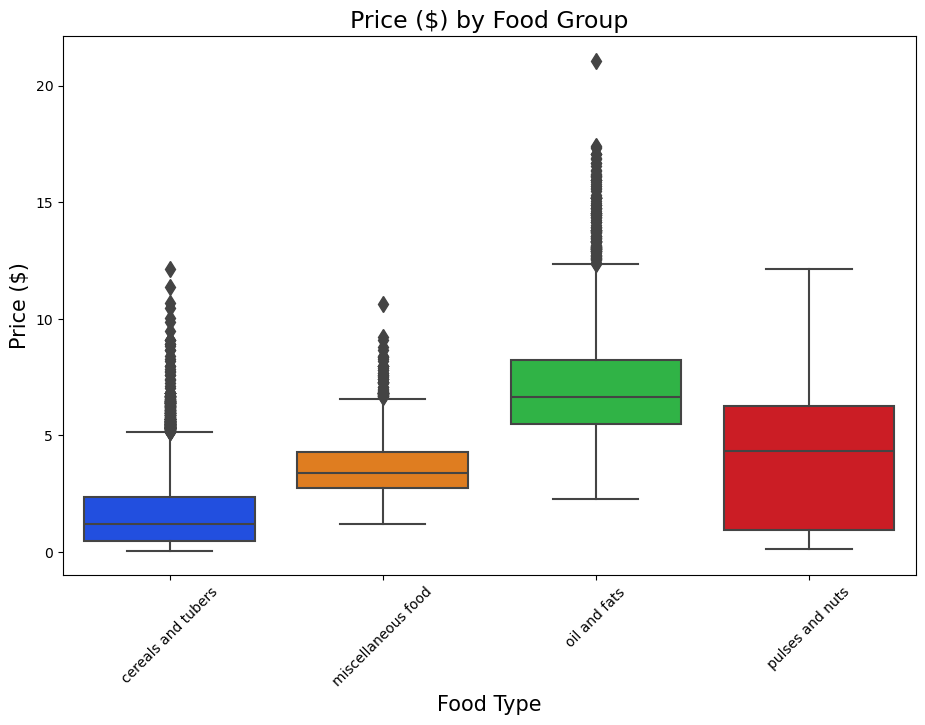

In [16]:
# Creating boxplot for Price Vs Food Type
plt.figure(figsize=(11,7))
sns.boxplot(x='food_type', y='usdprice', palette='bright', fliersize=8, width=0.8, data=haiti_df)
plt.title('Price ($) by Food Group', fontsize=17)
plt.xlabel('Food Type', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

#### Comments:

1. Oil and fats are consistently the most expensive group, with a wider spread and extreme prices (above 20$).

2. Cereals and tubers show more price fluctuation than expected. This is alarming as they represent the everyday meal of each Haitins household.

3. Price outliers across all food categories reflect the supply chain instability, political unrest, transport infrastructure, and other relevant structural factors in Haiti. These factors can cause sharp price spikes in regions.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


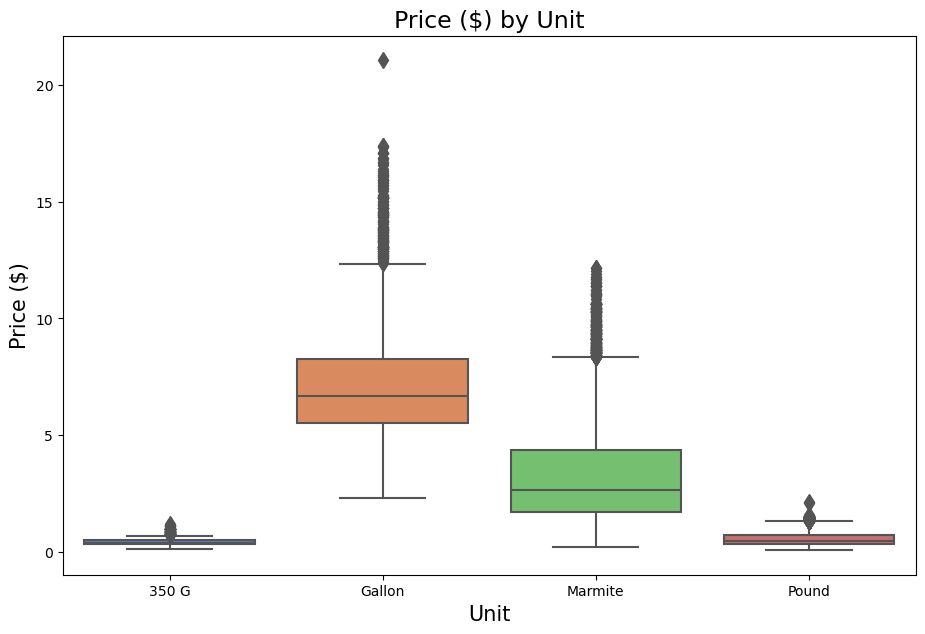

In [17]:
# Creating boxplot for Price Vs Unit
plt.figure(figsize=(11,7))
sns.boxplot(x='unit', y='usdprice', palette='muted', fliersize=8, width=0.8, data=haiti_df)
plt.title('Price ($) by Unit', fontsize=17)
plt.xlabel('Unit', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.show()

#### Comments:

1. Units like Gallon and Marmite are prone to greater price variation. This may be attributed to commodity sensitivity to inflation, supply chains, or imports.

2. Smaller units (350 G and Pound) tend to be more affordable for Haitian inhabitants.

##### Now, let's explore price variability across  Haiti's departments.

For a better visualization, a catplot is preferable to a boxplot. This is to avoid the cluttering all 9 departments.

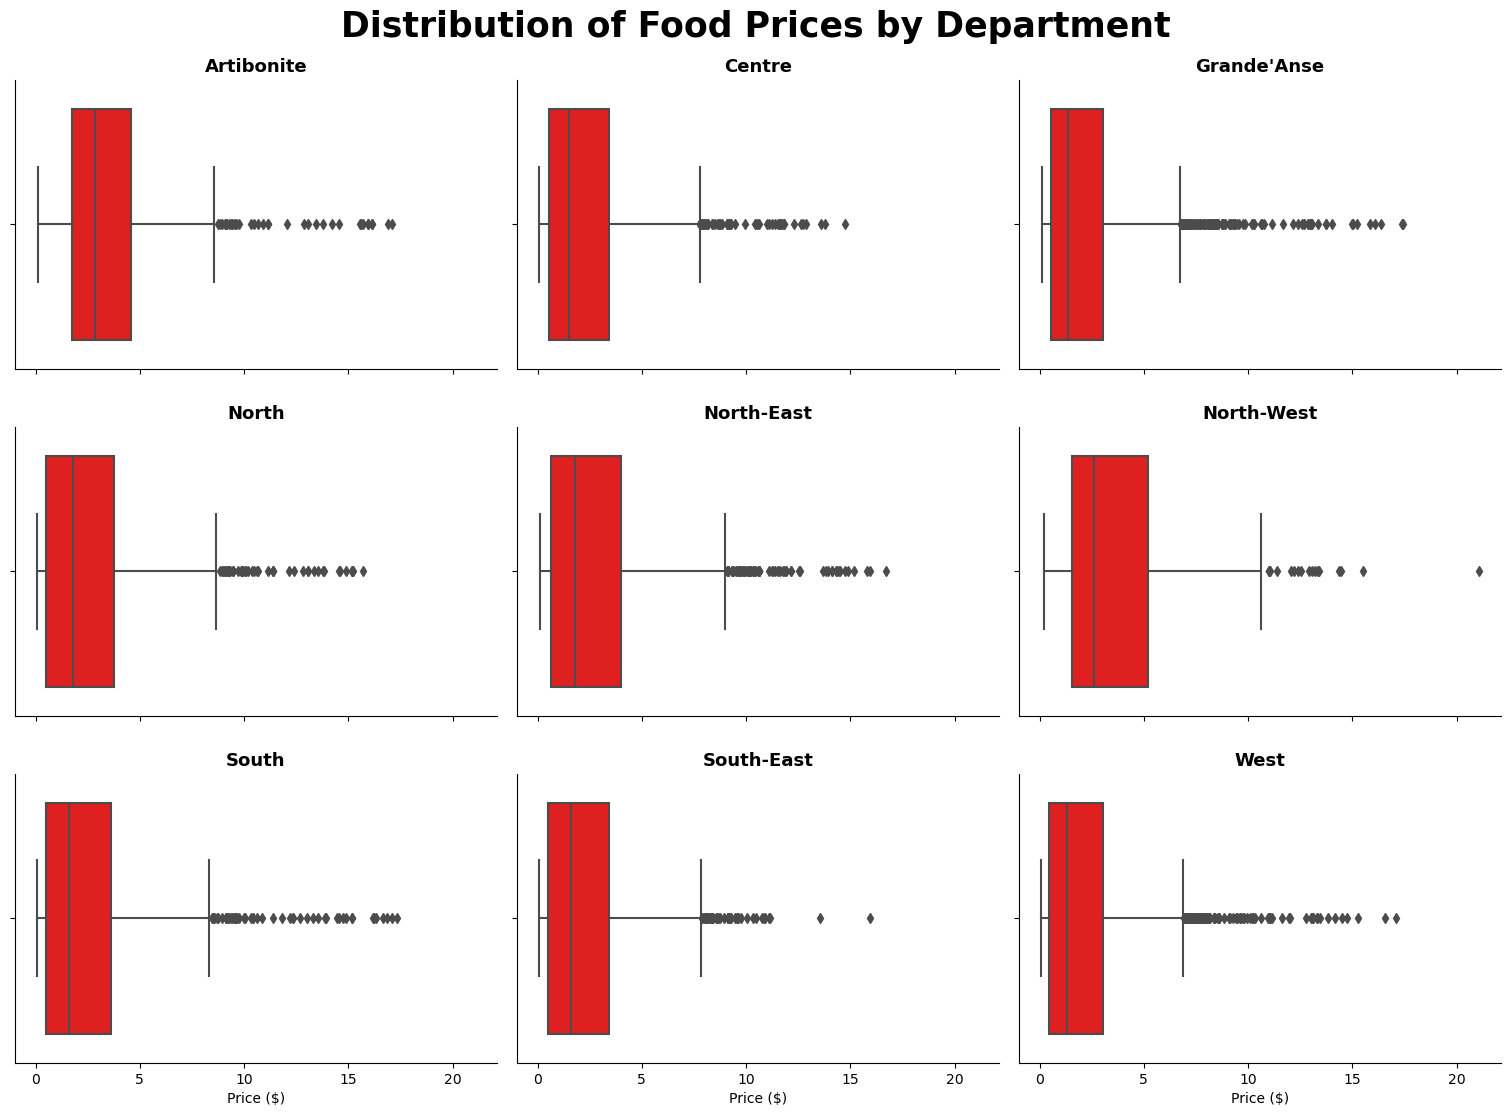

In [37]:
# Creating a catplot for Price Vs Departments
cat = sns.catplot(data=haiti_df, x='usdprice', col='Department', kind='box', showfliers=True,color='red',col_wrap=3, height=3.9, aspect=1.3)
cat.set_titles("{col_name}", size= 13, fontweight='bold')
cat.fig.suptitle('Distribution of Food Prices by Department', fontweight= 'bold',fontsize=25)
cat.set_axis_labels('Price ($)',"")
cat.fig.subplots_adjust(top=0.92, hspace=0.2, bottom=0.08) 

##### I noticed that the 'Price ($)' axis is only showing on the last 3 subplots. Researching the codes and adjusting the plot's parameters, I  found a solution to this issue.

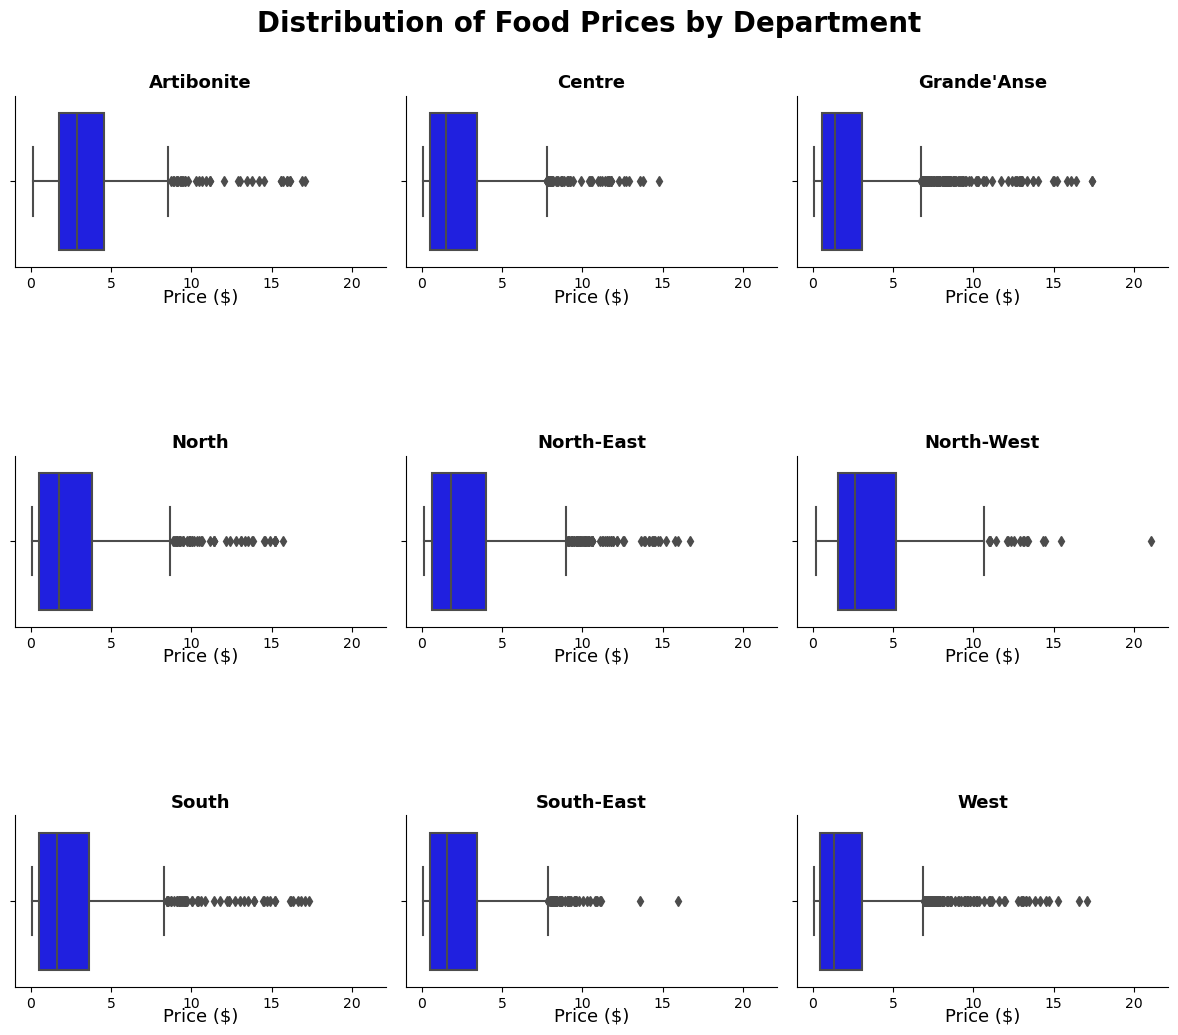

In [39]:
# Creating a catplot for Price Vs Departments
cat = sns.catplot(data=haiti_df, x='usdprice', col='Department', kind='box', showfliers=True,color='blue',col_wrap=3, height=3.6, aspect=1.1)
cat.set_titles("{col_name}", size= 13, fontweight='bold')
cat.fig.suptitle('Distribution of Food Prices by Department', fontweight= 'bold',fontsize=20)
cat.fig.subplots_adjust(top=0.90, hspace=1.1, bottom=0.075) 

# To show Price ($) on each row
for ax in cat.axes.flatten():
    ax.set_xlabel('') # this is to remove the 'usdprice' as default
    ax.text(0.5, -0.2, "Price ($)", transform=ax.transAxes,
            ha='center', fontsize=13) # To include Price($) text 
    ax.tick_params(axis='x', labelbottom=True) # For showing Price($) in every row


#### Comments:

1. Notably, departments like West and Grande Anse display broader price ranges and more extreme outliers compared to departments such as Centre or South-East. This pattern suggests sharp market volatility in those areas, likely driven by stronger urban demand, especially in Port-au-Prince, Haiti’s capital, where economic activity is concentrated and the population density is the highest.

2. While most departments cluster around lower price levels (under $5), the consistent presence of high food price outliers across all regions signals systemic inequality and a vulnerability to galloping inflation. These patterns are likely the result of profound structural issues such as a centralized  market, underdeveloped infrastructures, currency instability, import dependence, and insecurity (with the strong emergence of gang members) which leads to decreased flow of goods

---

###  Exploring Barplots

Due to the high frequency of price outliers and the non-normal distribution of the dataset, we will analyze all commodities using the **median price**. Unlike the mean, the median is more robust to extreme values. In economically unstable markets like Haiti, the median price will capture the central tendency more effectively.

/tmp/ipykernel_141/3940155623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_prices = haiti_df.groupby('commodity')['usdprice'].median().sort_values(ascending=False).head(10)


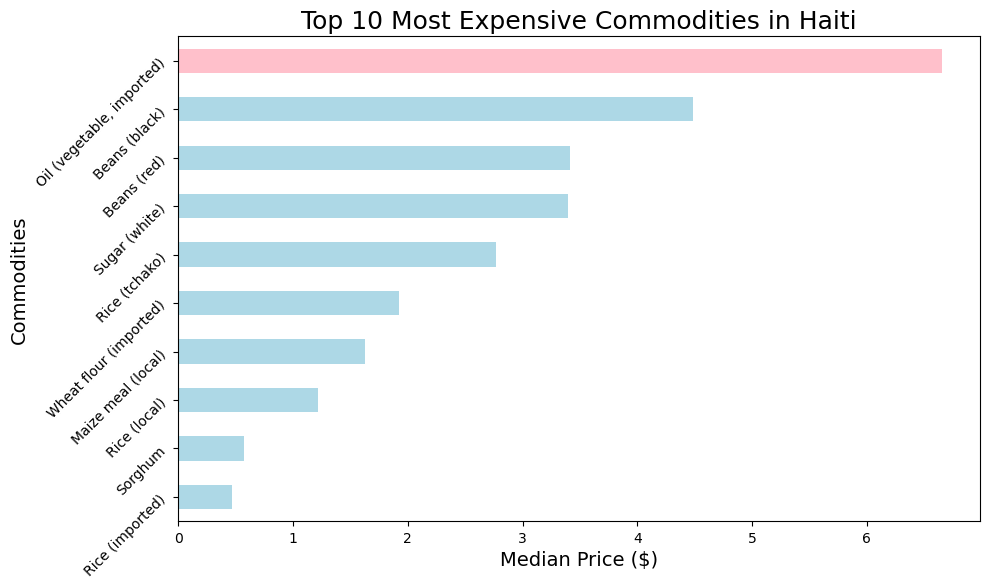

In [11]:
# Comparing median prices by commodities
median_prices = haiti_df.groupby('commodity')['usdprice'].median().sort_values(ascending=False).head(10)

# Plotting the median prices
col = ['pink' if i=='Oil (vegetable, imported)' else 'lightblue' for i in median_prices.index]

median_prices.plot(kind='barh', figsize=(10, 6), color=col)
plt.xlabel('Median Price ($)',fontsize=14)
plt.ylabel('Commodities', fontsize=14)

plt.title('Top 10 Most Expensive Commodities in Haiti', fontsize=18)
plt.gca().invert_yaxis()
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart sharply profiles the 10 most expensive food commodities in Haiti based on their median price in dollars, and it reveals some important socio-economic patterns.

1. The median price leader, Oil (vegetables, imported), suggests that processed imports carry the highest financial burden. This aligns well with Haiti’s dependency on imports, its vulnerability to global inflationary shocks, and exchange rate pressures.

2. It is not surprising that beans and sugar (both staple goods - consumed regularly) have elevated costs. It will likely impact low-income Haitians the hardest, especially in regions with limited agricultural productivity or limited market access.

Now, let's investigate which products has the overall trends.

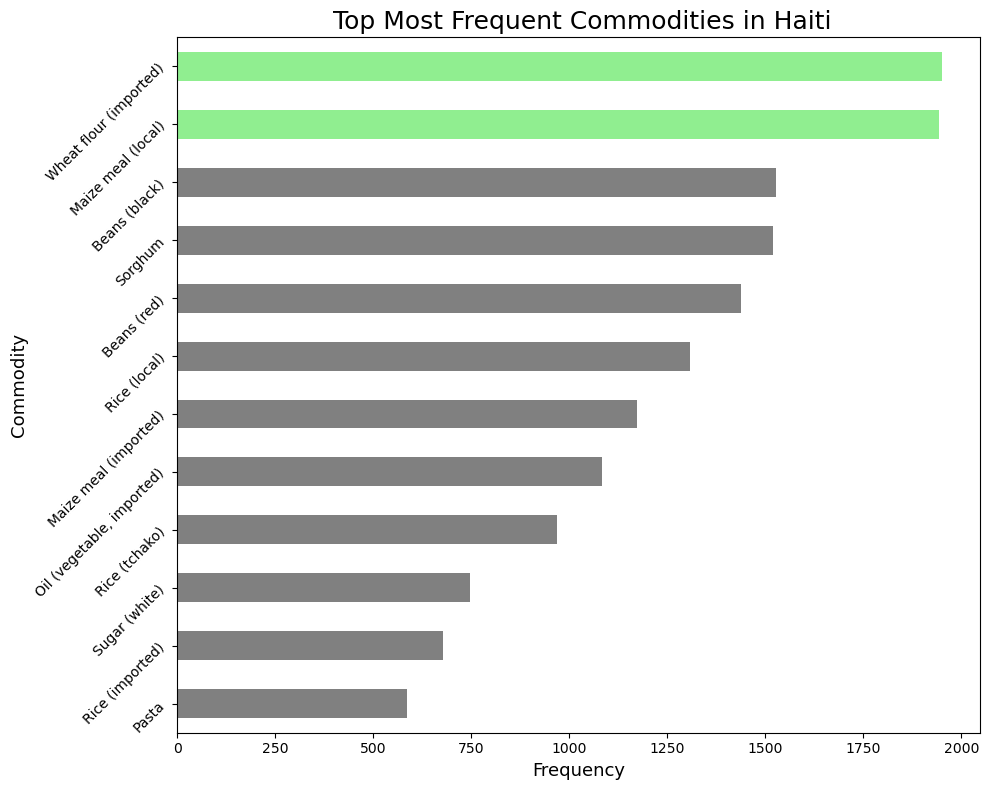

In [115]:
# Plotting Commodities Frequency
top_frequent_commodities= haiti_df['commodity'].value_counts().head(12)

colors = ['lightgreen' if x=='Wheat flour (imported)' else 'lightgreen' if x=='Maize meal (local)' else 'grey' for x in top_frequent_commodities.index]

top_frequent_commodities.plot(kind='barh', color=colors, figsize=(10, 8))
plt.xlabel('Frequency', fontsize=13)
plt.ylabel('Commodity', fontsize=13)
plt.title(' Top Most Frequent Commodities in Haiti', fontsize=18)
plt.yticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


This plot reflects how frequently each commodity appears in the dataset. In this case,**wheat flour(imported)** and **Maize meal (local)** rank highest, suggesting they're more consistently available across regions and widely consumed or traded. Their frequent reporting plays a crucial role in tracking inflationary patterns, making them key indicators in Haiti's food economy.

## Question
**Can geography and infrastructure significantly shape food affordability in Haiti?**

Let's find out with some more visualization with the two most frequent commodities.

/tmp/ipykernel_148/3479944084.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dept_prices = filtered.groupby('Department')['usdprice'].median().sort_values()


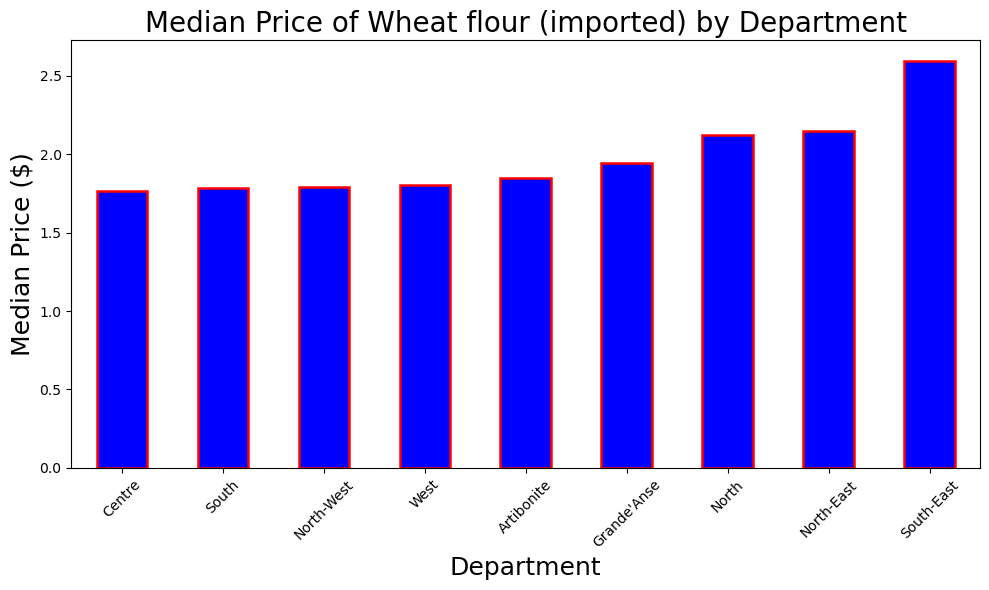

In [127]:
# Barplot by Department for Key Commodities
item1 = 'Wheat flour (imported)'  
filtered = haiti_df[haiti_df['commodity'] == item1]
dept_prices = filtered.groupby('Department')['usdprice'].median().sort_values()

dept_prices.plot(kind='bar', color='blue',edgecolor='red', linewidth=1.8, figsize=(10, 6))
plt.ylabel('Median Price ($)', fontsize=18)
plt.title(f'Median Price of {item1} by Department', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Department', fontsize=18)
plt.tight_layout()
plt.show()


#### Comments:

The price variation between the median price of imported wheat flour across Haiti's departments is striking. While most departments are in the 1.8 – 2.0 dollar range, South-East stands out significantly, exceeding 2.5 dollars. This price spike could point to **infrastructure challenges** and **weaker market access**. 

/tmp/ipykernel_141/3921858282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dept_prices = filtered.groupby('Department')['usdprice'].median().sort_values()


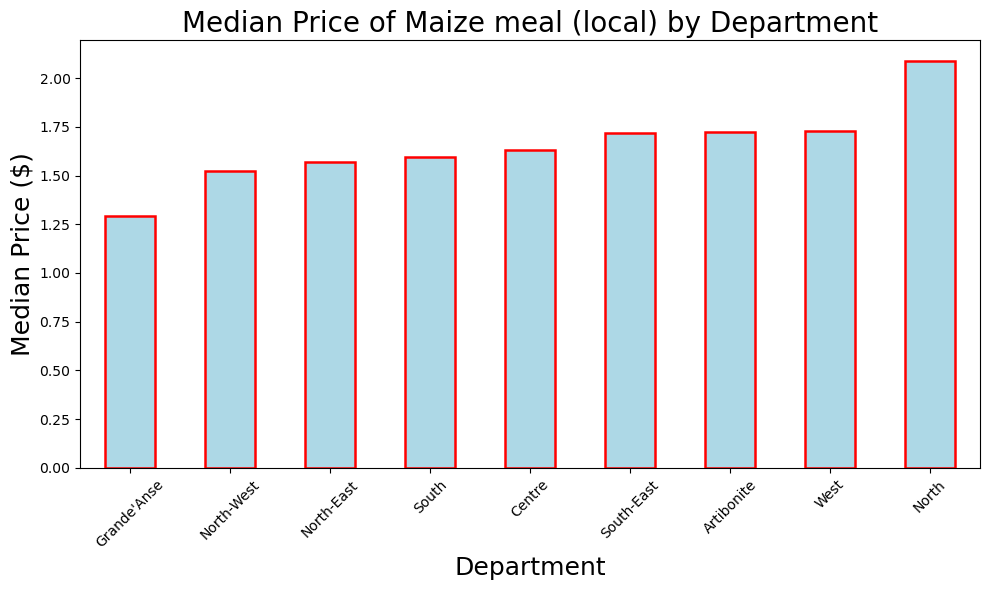

In [13]:
# Barplot by Department for Maize meal (local)
item2 = 'Maize meal (local)' 
filtered = haiti_df[haiti_df['commodity'] == item2]
dept_prices = filtered.groupby('Department')['usdprice'].median().sort_values()

dept_prices.plot(kind='bar', color='lightblue',edgecolor='red', linewidth=1.8, figsize=(10, 6))
plt.ylabel('Median Price ($)', fontsize=18)
plt.title(f'Median Price of {item2} by Department', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Department', fontsize=18)
plt.tight_layout()
plt.show()


#### Comments:

In the North region, the median price of maize meal (local) stands out, hovering around 2.00 dollars. This price elevation may reflect limited road connectivity, strained local supply chains, and traffic jams caused by inadequate infrastructure. Moreover, the spike may be reflecting regional inflationary pressures, especially because maize meal is essential in Haiti's food economy.

Notably, the spread here isn’t as extreme as with imported wheat flour (imported), but the fact that even a domestic commodity like maize meal (local) shows regional variability is telling.

This led me to ask about the price variability between imported and local staples.

#### Local vs. Imported Price Volatility


A comparative look at maize meal (local) and wheat flour (imported) highlights a core structural pattern in Haiti's food economy: imported commodities exhibit greater price volatility and regional disparity than their local counterparts. > > For instance, wheat flour's median prices spike sharply in South-East, while maize meal shows more modest variation, with the North department as a notable outlier. These differences likely stem from supply chain complexity, import dependency, and infrastructure challenges — all of which disproportionately affect the pricing of foreign goods. > > Together, these charts emphasize that while local staples aren't immune to price distortion, imports carry a heavier burden in both cost and instability, compounding food insecurity for vulnerable populations.

/tmp/ipykernel_141/3751379306.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = filtered_df.groupby(['Department','commodity'])['usdprice'].median().unstack()


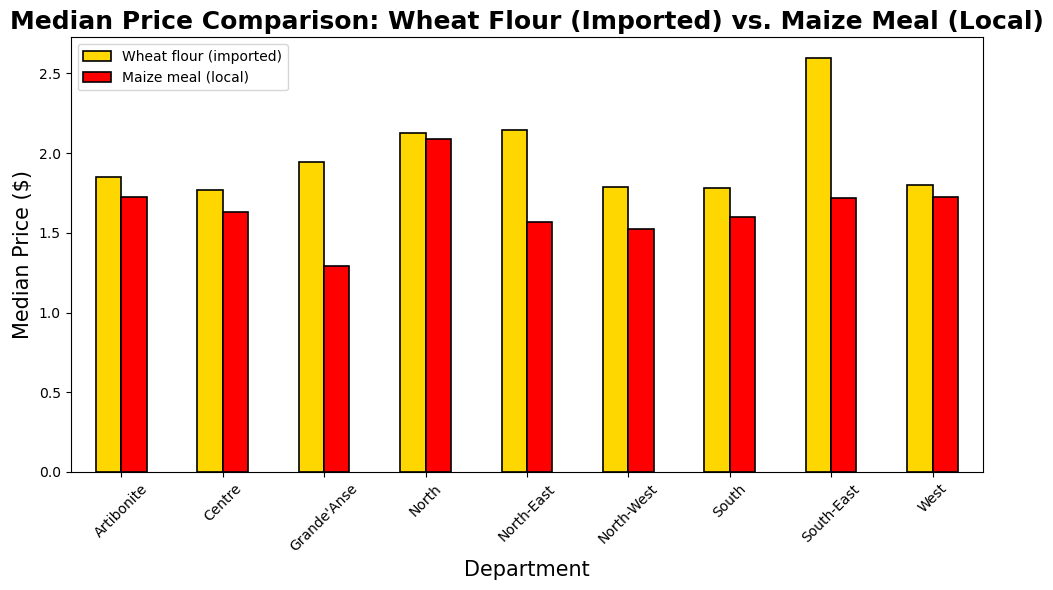

In [36]:
# Filter for the two commodities
commodities = ['Wheat flour (imported)', 'Maize meal (local)']
filtered_df = haiti_df[haiti_df['commodity'].isin(commodities)]

# Group and pivot to get median prices by Department
# N.B. - the unstack() is to move 'commodity' from index to columns to make the side-by-side bar with unique colors possible
# N.B. - the reindex() is to make sure the columns are present in the exact order(Wheat flour and Maize meal) to be filled with the same color.
medians = filtered_df.groupby(['Department','commodity'])['usdprice'].median().unstack() 
medians = medians.reindex(columns=commodities)

# Plotting the side-by-side bar
medians.plot(kind='bar', figsize=(10, 6), color=['gold','red'], edgecolor='black', linewidth=1.2)
plt.title('Median Price Comparison: Wheat Flour (Imported) vs. Maize Meal (Local)', fontsize=18, fontweight='bold')
plt.xlabel('Department', fontsize=15)
plt.ylabel('Median Price ($)', fontsize=15)
plt.legend(commodities)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**This demonstrates how imported goods are not only more expensive but also more unstable in Haiti. However, local commodities aren't immune to price fluctuations, as shown in the North department, likely due to poor road connectivity and other infrastructural challenges like electricity.**

---

#### Violin Plot

If we shift our focus to inequality and inflation sensitivity distribution, then plotting the violin plot is indispensable in a volatile market like Haiti’s. This plot will show how prices are spread out for some of Haiti’s top food commodities.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


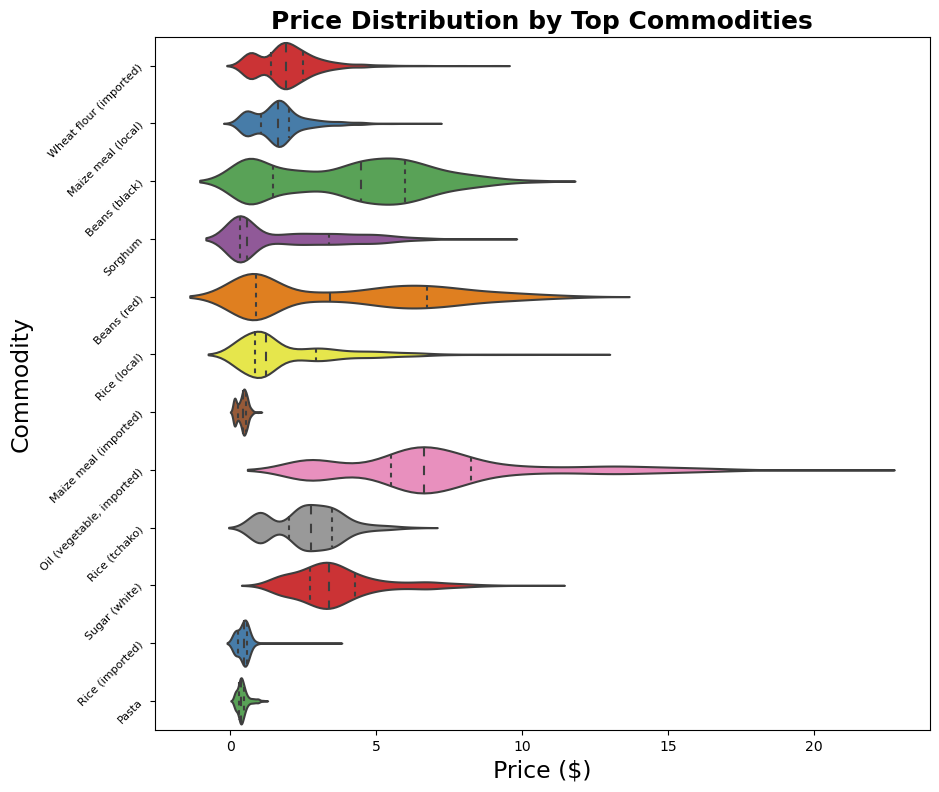

In [12]:
# top commodities for Haiti
commodity_ordered= haiti_df['commodity'].value_counts().index.tolist()

# Creating a violin plot
plt.figure(figsize=(10,9))
sns.violinplot(y='commodity', x='usdprice', data=haiti_df, order=commodity_ordered, inner='quartile', scale='width', palette='Set1')
plt.title('Price Distribution by Top Commodities', fontsize=18, fontweight='bold')
plt.xlabel('Price ($)', fontsize=17)
plt.ylabel('Commodity', fontsize=17)
plt.yticks(rotation=45, fontsize=8)
plt.show()

1. Price volatility in imported commodities like wheat flour (imported) and oil (vegetable, imported) shows wide distributions, signaling **inconsistent pricing**. This tells us they're especially sensitive to phenomena like inflation, shipping costs, currency devaluation, or supply issues.

2. Tighter clustering for local commodities Maize meal (local) and rice (tchako) display narrower violins, which is a sign of **price consistency**. This might be explained by tighter regulation in localized markets.

3. Right-skewed distribution is indicative of high inequality or sudden inflation spikes in certain regions.

# --- End of EDA ---

<div style="border:2px solid black; padding=:15px; background-color:#f4f4f4;">
<h1 style="text-align:center;">Summary</h1>
<p> The exploratory analysis reveals unique pricing dynamics in Haiti’s food economy, driven by commodity type, geographic accessibility, and systemic structural issues. The consistent presence of right-skewed distributions in commodities like oil, wheat, and rice necessitates robust modeling to predict and manage food price shocks better.</p>
<hr style="border:1px ridge red; background-color: blue">
<h3 style="text-align:center;"> Presented by:
<a href="https://www.linkedin.com/in/carllegros/" target="_blank" style="color:blue;">Carl Legros </a>
</h3>
</div>
